<div style="display:fill;
           background-color:#F2E5E5;
           font-size:110%;
           font-family:'Garamond';
           letter-spacing:0.5px;border-bottom: 2px solid black;">

<img src="https://raw.githubusercontent.com/IqmanS/Machine-Learning-Notebooks/main/quality_of_writing/banner%20(2).jpg">
<H1 style="padding: 20px;color:black;font-weight:600;text-align: center;">📝 LINKING WRITING PROCESSES TO WRITING QUALITY</H1>
</div>


In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
sns.set_palette("rocket")
import string
# sns.color_palette("flare")

<div style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
    Table of Contents
    </h1>
</div>

<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #CE7777;font-size: 22px;"> 1. Dataset Overview </a><br>
<a href="#2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #CE7777;font-size: 22px;"> 2. Data Preprocessing & Feature Generation </a><br>
<a href="#3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #CE7777;font-size: 22px;"> 3. Exploratory Data Analysis & Visualization </a> <br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #CE7777;font-size: 22px;line-height: "> 4. Baseline Model Training </a><br>
<a href="#5" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #CE7777;font-size: 22px;"> 5. Feature Selection </a><br>
<a href="#6" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #CE7777;font-size: 22px;"> 6. Optuna Tuning </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #CE7777;font-size: 22px;"> 7. Creating 'submission.csv' </a>


<div id="1" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
    Dataset Overview
    </h1>
</div>

In [2]:
train_logs = pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv")
test_logs = pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv")
train_scores = pd.read_csv("/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv")

In [3]:
train_logs.head(20)

id  event_id  down_time  up_time  action_time       activity  \
0   001519c8         1       4526     4557           31  Nonproduction   
1   001519c8         2       4558     4962          404  Nonproduction   
2   001519c8         3     106571   106571            0  Nonproduction   
3   001519c8         4     106686   106777           91          Input   
4   001519c8         5     107196   107323          127          Input   
5   001519c8         6     107296   107400          104          Input   
6   001519c8         7     107469   107596          127          Input   
7   001519c8         8     107659   107766          107          Input   
8   001519c8         9     107743   107852          109          Input   
9   001519c8        10     107840   107978          138          Input   
10  001519c8        11     108008   108195          187          Input   
11  001519c8        12     108104   108259          155          Input   
12  001519c8        13     108229   108370          141          Input   
13  001519c8        14     108341   108486          145          Input   
14  001519c8        15     109296   109438          142          Input   
15  001519c8        16     109423   109559          136          Input   
16  001519c8        17     109560   109729          169          Input   
17  001519c8        18     109826   109994          168          Input   
18  001519c8        19     110398   110516          118     Remove/Cut   
19  001519c8        20     110595   110751          156          Input   

   down_event   up_event text_change  cursor_position  word_count  
0   Leftclick  Leftclick    NoChange                0           0  
1   Leftclick  Leftclick    NoChange                0           0  
2       Shift      Shift    NoChange                0           0  
3           q          q           q                1           1  
4           q          q           q                2           1  
5           q          q           q                3           1  
6           q          q           q                4           1  
7           q          q           q                5           1  
8           q          q           q                6           1  
9       Space      Space                            7           1  
10          q          q           q                8           2  
11          q          q           q                9           2  
12          q          q           q               10           2  
13      Space      Space                           11           2  
14          q          q           q               12           3  
15          q          q           q               13           3  
16          q          q           q               14           3  
17          q          q           q               15           3  
18  Backspace  Backspace           q               14           3  
19          q          q           q               15           3

In [4]:
train_scores.head(20)

id  score
0   001519c8    3.5
1   0022f953    3.5
2   0042269b    6.0
3   0059420b    2.0
4   0075873a    4.0
5   0081af50    2.0
6   0093f095    4.5
7   009e23ab    4.0
8   00e048f1    3.5
9   00e1f05a    4.5
10  00e713bd    4.5
11  00f0737e    2.5
12  00f8e84c    4.5
13  00fc9a6a    3.5
14  0144e4d5    2.5
15  014e7ae9    5.0
16  015aa732    5.0
17  0178a105    3.0
18  0182aa1c    4.0
19  0190ff4c    4.0

<div id="2" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
    Data Preprocessing & Feature Generation
    </h1>
</div>

In [5]:
char = []
freq = []
for i in train_logs["up_event"].unique():
    char.append(i)
    freq.append(len(train_logs[train_logs["up_event"]==i]))
    
freq_of_chars = pd.DataFrame()
freq_of_chars["char"] = char
freq_of_chars["freq"] = freq
freq_of_chars.sort_values("freq",ascending=False,inplace=True)
freq_of_chars.reset_index(inplace=True,drop=True)
freq_of_chars.head()

char     freq
0           q  5364789
1       Space  1207128
2   Backspace   964089
3       Shift   334227
4  ArrowRight   121338

In [6]:
def cleanActivity(activity):
    if (activity[:4] == "Move"):
        return "Move"
    return activity
    
def ProcessData(logs):
    logs["activity"] = logs["activity"].apply(cleanActivity)    
    logs["total_event_time"] = logs["up_time"]-logs["down_time"]
    
    data = pd.DataFrame()
    data['events'] = logs.groupby('id')['event_id'].max()
    data['up_time_sum'] = logs.groupby('id')['up_time'].sum()
    data['up_time_mean'] = logs.groupby('id')['up_time'].mean()
    data['up_time_std'] = logs.groupby('id')['up_time'].std()

    data['down_time_sum'] = logs.groupby('id')['down_time'].sum()
    data['down_time_mean'] = logs.groupby('id')['down_time'].mean()
    data['down_time_std'] = logs.groupby('id')['down_time'].std()
    
    data['event_time_sum'] = logs.groupby('id')['total_event_time'].sum()
    data['event_time_mean'] = logs.groupby('id')['total_event_time'].mean()
    data['event_time_std'] = logs.groupby('id')['total_event_time'].std()

    data['action_time_sum'] = logs.groupby('id')['action_time'].sum()
    data['action_time_max'] = logs.groupby('id')['action_time'].max()
    data['action_time_mean'] = logs.groupby('id')['action_time'].mean()
    data['action_time_std'] = logs.groupby('id')['action_time'].std()

    data['down_up_ratio'] = logs.groupby('id')['down_time'].mean() / logs.groupby('id')['up_time'].mean()
    data['down_action_ratio'] = logs.groupby('id')['down_time'].mean() / logs.groupby('id')['action_time'].mean()
    data['up_action_ratio'] = logs.groupby('id')['up_time'].mean() / logs.groupby('id')['action_time'].mean()

    data['down_event_nunique'] = logs.groupby('id')['down_event'].nunique()
    data['up_event_nunique'] = logs.groupby('id')['up_event'].nunique()
    
    data['cursor_position_nunique'] = logs.groupby('id')['cursor_position'].nunique()
    data['cursor_position_median'] = logs.groupby('id')['cursor_position'].median()
    data['cursor_position_max'] = logs.groupby('id')['cursor_position'].max()

    data['word_count_max'] = logs.groupby('id')['word_count'].max()
    data['word_count_mean'] = logs.groupby('id')['word_count'].mean()
    
    j = 1
    for i in freq_of_chars.char[:100]:
        col = i
        if i in string.punctuation:
            col = "sp_char"+str(j)
            j+=1
        data[f"{col}_event"] = logs[logs['down_event']==i].groupby("id").count()["down_event"]
        data[f"{col}_event"] = data[f"{col}_event"].fillna(0).astype("int64")
        
    for i in ['Nonproduction', 'Input', 'Remove/Cut', 'Replace', 'Paste', 'Move']:
        data[f"{i}_activity"] = logs[logs['activity']==i].groupby("id").count()["activity"]
        data[f"{i}_activity"] = data[f"{i}_activity"].fillna(0).astype("int64")
       
    return data

In [7]:
train_data = ProcessData(train_logs)
train_data = pd.merge(train_data,train_scores,on="id")
train_data.drop(["id"],inplace=True,axis=1)
train_data.head()

events  up_time_sum   up_time_mean    up_time_std  down_time_sum  \
0    2557   2169095477  848297.018772  395105.685655     2168798234   
1    2454   1273546414  518967.568867  384952.728796     1273271023   
2    4136   3427063183  828593.612911  489500.438784     3426641982   
3    1556   1222401185  785604.874679  385206.081250     1222211589   
4    2531   1805813176  713478.141446  405575.631746     1805499474   

   down_time_mean  down_time_std  event_time_sum  event_time_mean  \
0   848180.771998  395112.665961          297243       116.246774   
1   518855.347596  384959.404177          275391       112.221271   
2   828491.775145  489500.796565          421201       101.837766   
3   785483.026350  385205.014399          189596       121.848329   
4   713354.197550  405576.409034          313702       123.943896   

   event_time_std  ...  MediaPlayPause_event  j_event  V_event  \
0       91.797374  ...                     0        0        0   
1       55.431189  ...                     0        0        0   
2       82.383766  ...                     0        0        0   
3      113.768226  ...                     0        0        0   
4       62.082013  ...                     0        0        0   

   Nonproduction_activity  Input_activity  Remove/Cut_activity  \
0                     120            2010                  417   
1                     254            1938                  260   
2                     175            3515                  439   
3                      99            1304                  151   
4                      72            1942                  517   

   Replace_activity  Paste_activity  Move_activity  score  
0                 7               0              3    3.5  
1                 1               1              0    3.5  
2                 7               0              0    6.0  
3                 1               1              0    2.0  
4                 0               0              0    4.0  

[5 rows x 131 columns]

In [8]:
test_data = ProcessData(test_logs)
test_data.head()

events  up_time_sum  up_time_mean    up_time_std  down_time_sum  \
id                                                                          
0000aaaa       2      1098678      549339.0  298145.917433        1098506   
2222bbbb       2      1002571      501285.5  298027.830601        1002458   
4444cccc       2       820693      410346.5  318614.537428         820543   

          down_time_mean  down_time_std  event_time_sum  event_time_mean  \
id                                                                         
0000aaaa        549253.0  298144.503219             172             86.0   
2222bbbb        501229.0  298012.981358             113             56.5   
4444cccc        410271.5  318587.667370             150             75.0   

          event_time_std  ...  d_event  MediaPlayPause_event  j_event  \
id                        ...                                           
0000aaaa        1.414214  ...        0                     0        0   
2222bbbb       14.849242  ...        0                     0        0   
4444cccc       26.870058  ...        0                     0        0   

          V_event  Nonproduction_activity  Input_activity  \
id                                                          
0000aaaa        0                       0               2   
2222bbbb        0                       0               2   
4444cccc        0                       0               2   

          Remove/Cut_activity  Replace_activity  Paste_activity  Move_activity  
id                                                                              
0000aaaa                    0                 0               0              0  
2222bbbb                    0                 0               0              0  
4444cccc                    0                 0               0              0  

[3 rows x 130 columns]

<div id="3" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
    Exploratory Data Analysis & Visualization
    </h1>
</div>

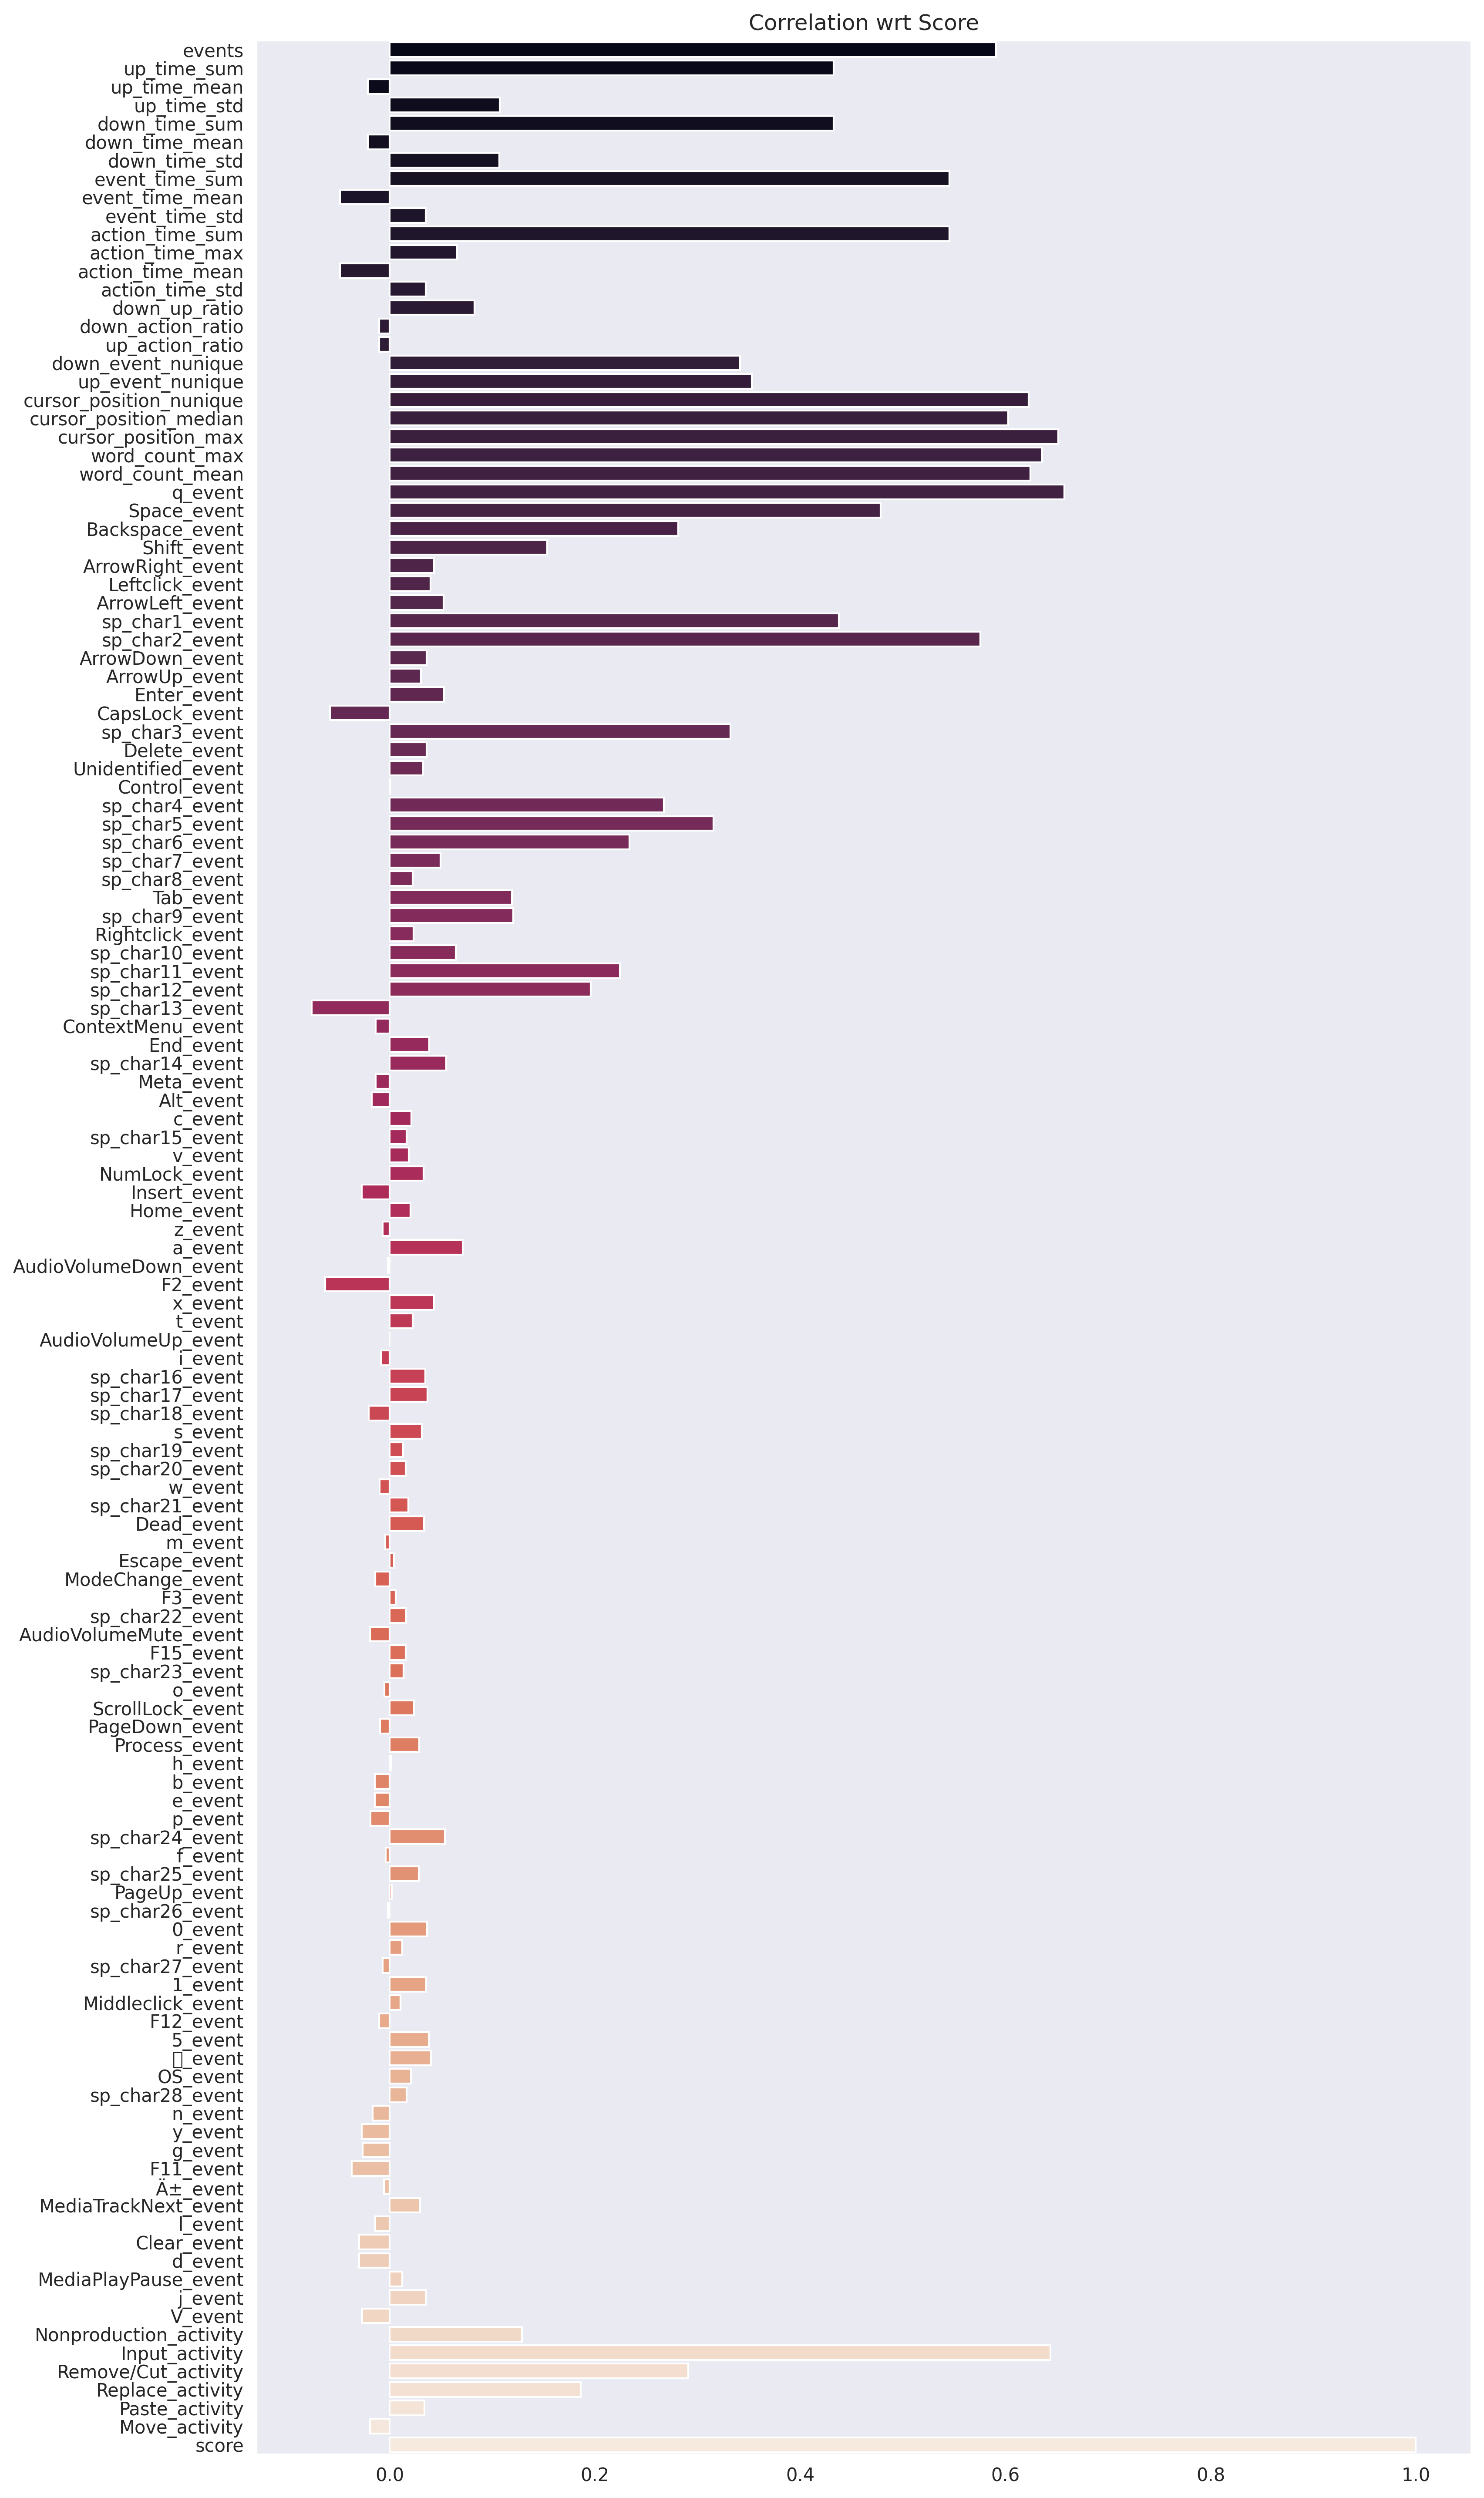

In [9]:
plt.figure(figsize=(12,24),dpi=300)
sns.barplot(train_data.corr()[-1:][:],orient="h",palette="rocket")
plt.title("Correlation wrt Score");

In [10]:
fig,axes = plt.subplots(75,2,figsize=(15,150),dpi=300)

for ind,col in enumerate(train_data.columns[:75]):
    
    plt.subplot(75,2,2*ind+1)
    sns.histplot(train_data,x=col,bins=40,kde=True);
    plt.gca().set_title(col)
        
    plt.subplot(75,2,2*ind+2)
    sns.boxplot(train_data,x=col,orient="h",palette="flare")
    plt.gca().set_title(col)
    
fig.tight_layout()
plt.show()

In [11]:
import sklearn
# sklearn.metrics.get_scorer_names() 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, HuberRegressor, BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

seed = np.random.seed(6)

In [12]:
def plotImportance(modelName,model):
    history = pd.DataFrame()
    history["cols"] = X_test.columns
    history["imp"] = model.feature_importances_
    history.sort_values("imp",inplace=True,ascending=False)
    history.reset_index(inplace=True,drop=True)
    plt.figure(figsize=(20,12))
    sns.barplot(x=history["imp"],y=history["cols"],palette="rocket");
    plt.title(f"{modelName} Feature Importance")
    return history

In [13]:
cols = [i for i in train_data.columns if i!="score"]

X = train_data[cols]
y = train_data["score"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=seed)

<div id="4" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
   Baseline Model Training
    </h1>
</div>

### 1. Baseline RF

In [14]:
rfmodel = RandomForestRegressor(random_state=seed)
rfmodel.fit(X_train,y_train)
print("-"*25,"RF Model Baseline","-"*25)
preds = rfmodel.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(rfmodel,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- RF Model Baseline -------------------------
MAE: 0.5234191176470587
MSE: 0.4565876838235294
RMSE: 0.6757127228516046
RMSE CV: 0.6605522424943168


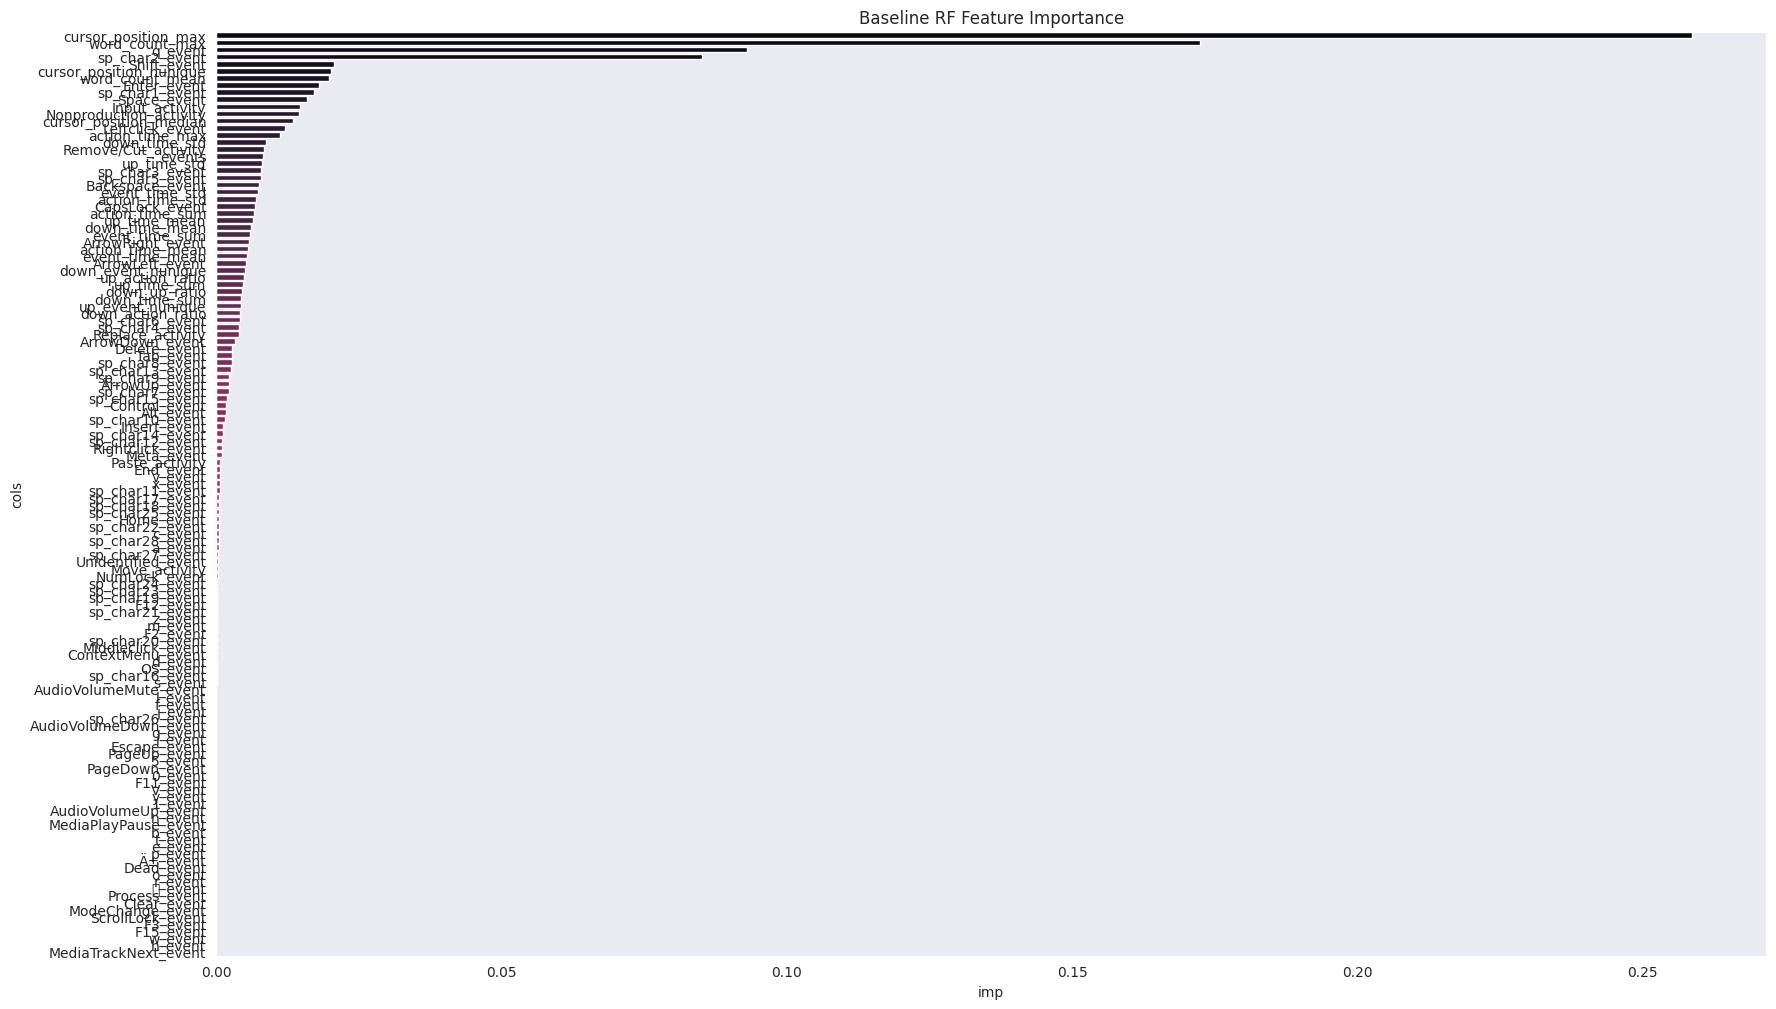

In [15]:
rf_importance = plotImportance("Baseline RF",rfmodel)

### Baseline GB

In [16]:
gbmodel = GradientBoostingRegressor(random_state=seed)
gbmodel.fit(X_train,y_train)
print("-"*25,"GB Model Baseline","-"*25)
preds = gbmodel.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(gbmodel,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- GB Model Baseline -------------------------
MAE: 0.5209216777115533
MSE: 0.44973768498774674
RMSE: 0.6706248466823659
RMSE CV: 0.6581625345168296


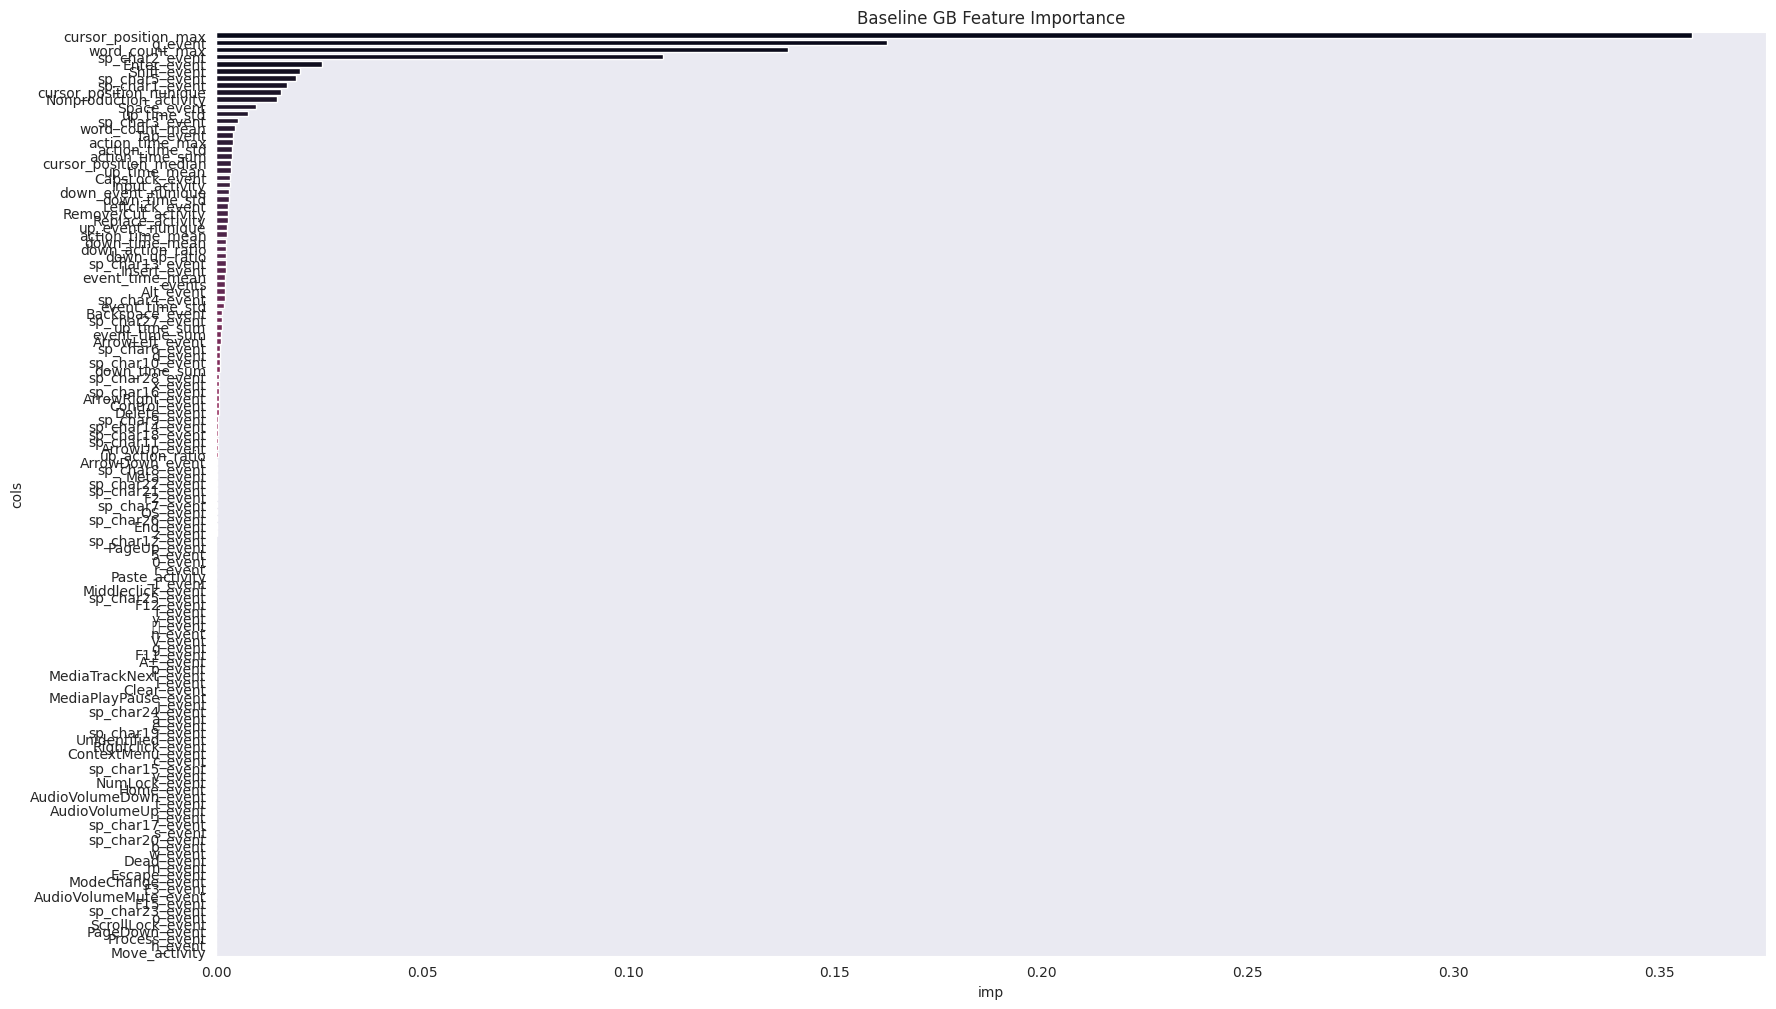

In [17]:
gb_importance = plotImportance("Baseline GB",gbmodel)

### Baseline XGB

In [18]:
xgbmodel = XGBRegressor(n_estimators=4321,random_state=seed,tree_method = "gpu_hist")
xgbmodel.fit(X_train,y_train)
print("-"*25,"XGB Model Baseline","-"*25)
preds = xgbmodel.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(xgbmodel,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- XGB Model Baseline -------------------------
MAE: 0.5535310420627687
MSE: 0.5043678224425385
RMSE: 0.7101885823093318
RMSE CV: 0.7173647205574905


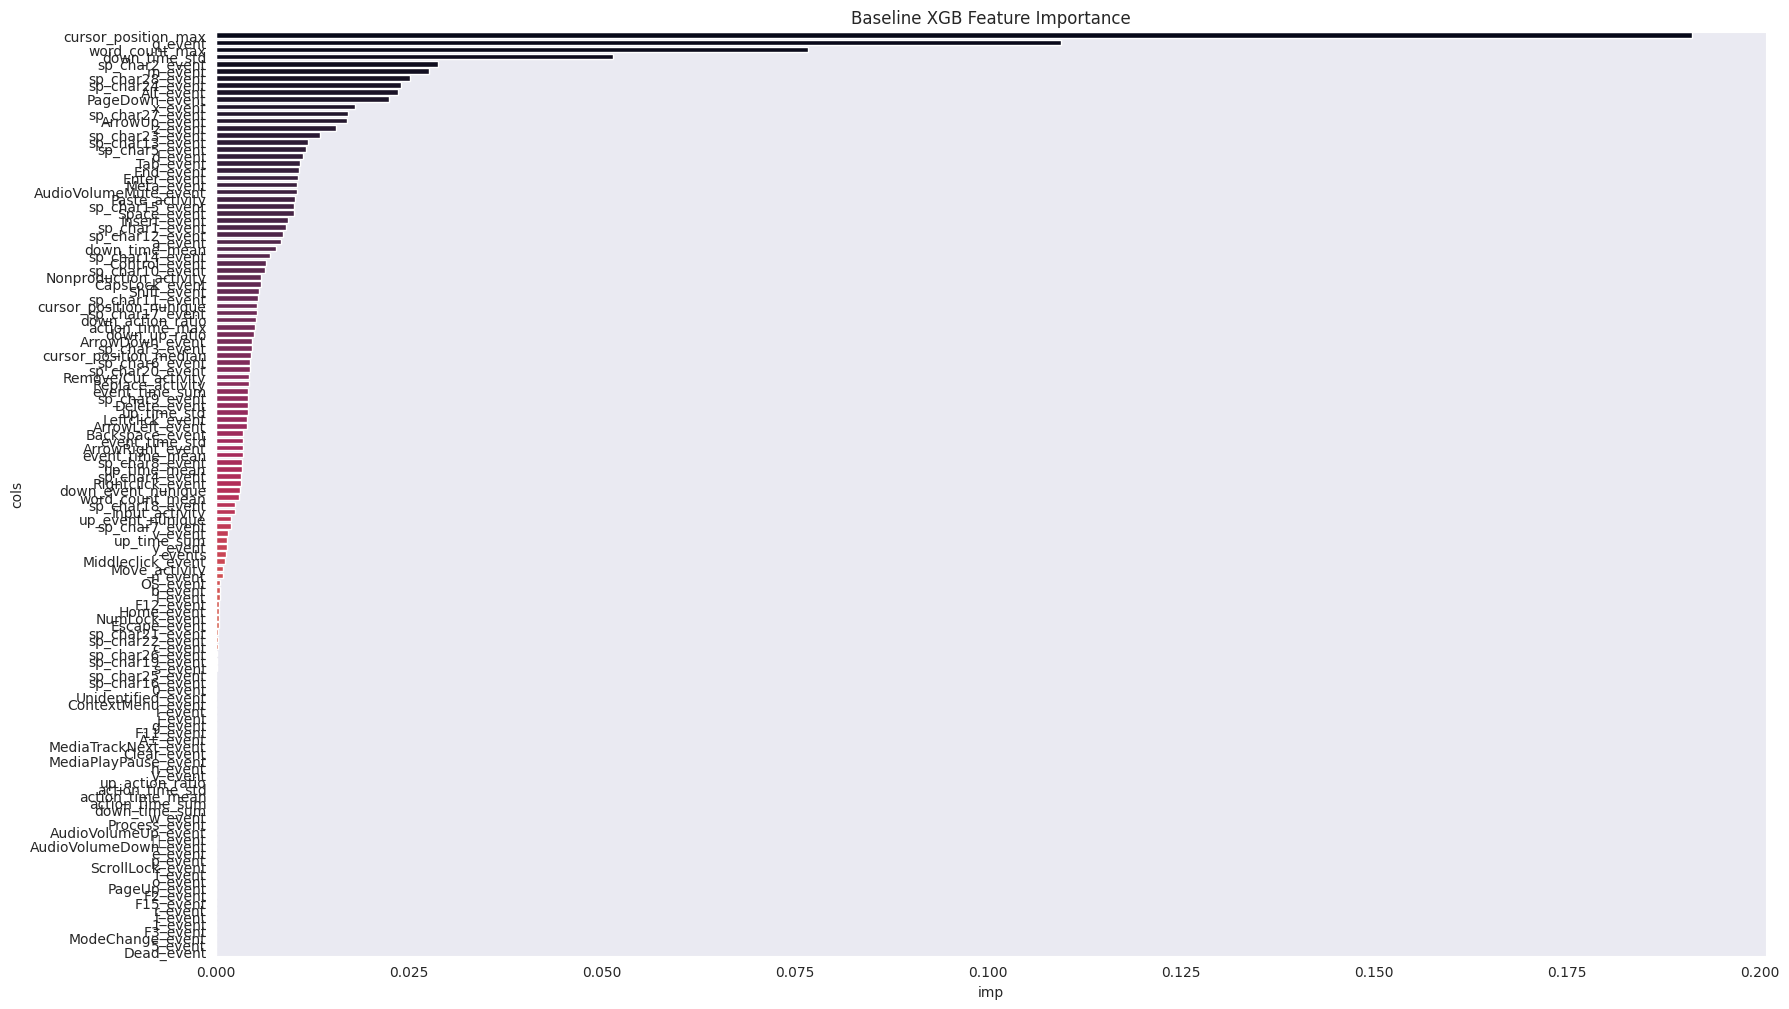

In [19]:
xgb_importance = plotImportance("Baseline XGB",xgbmodel)

### Baseline LGBM

In [20]:
lgbmmodel = LGBMRegressor(random_state=seed,device="gpu", metric= 'rmse')
lgbmmodel.fit(X_train,y_train)
print("-"*25,"LGBM Model Baseline","-"*25)
preds = lgbmmodel.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(lgbmmodel,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- LGBM Model Baseline -------------------------
MAE: 0.5277014801023885
MSE: 0.4735376827907694
RMSE: 0.6881407434462585
RMSE CV: 0.6659173891070036


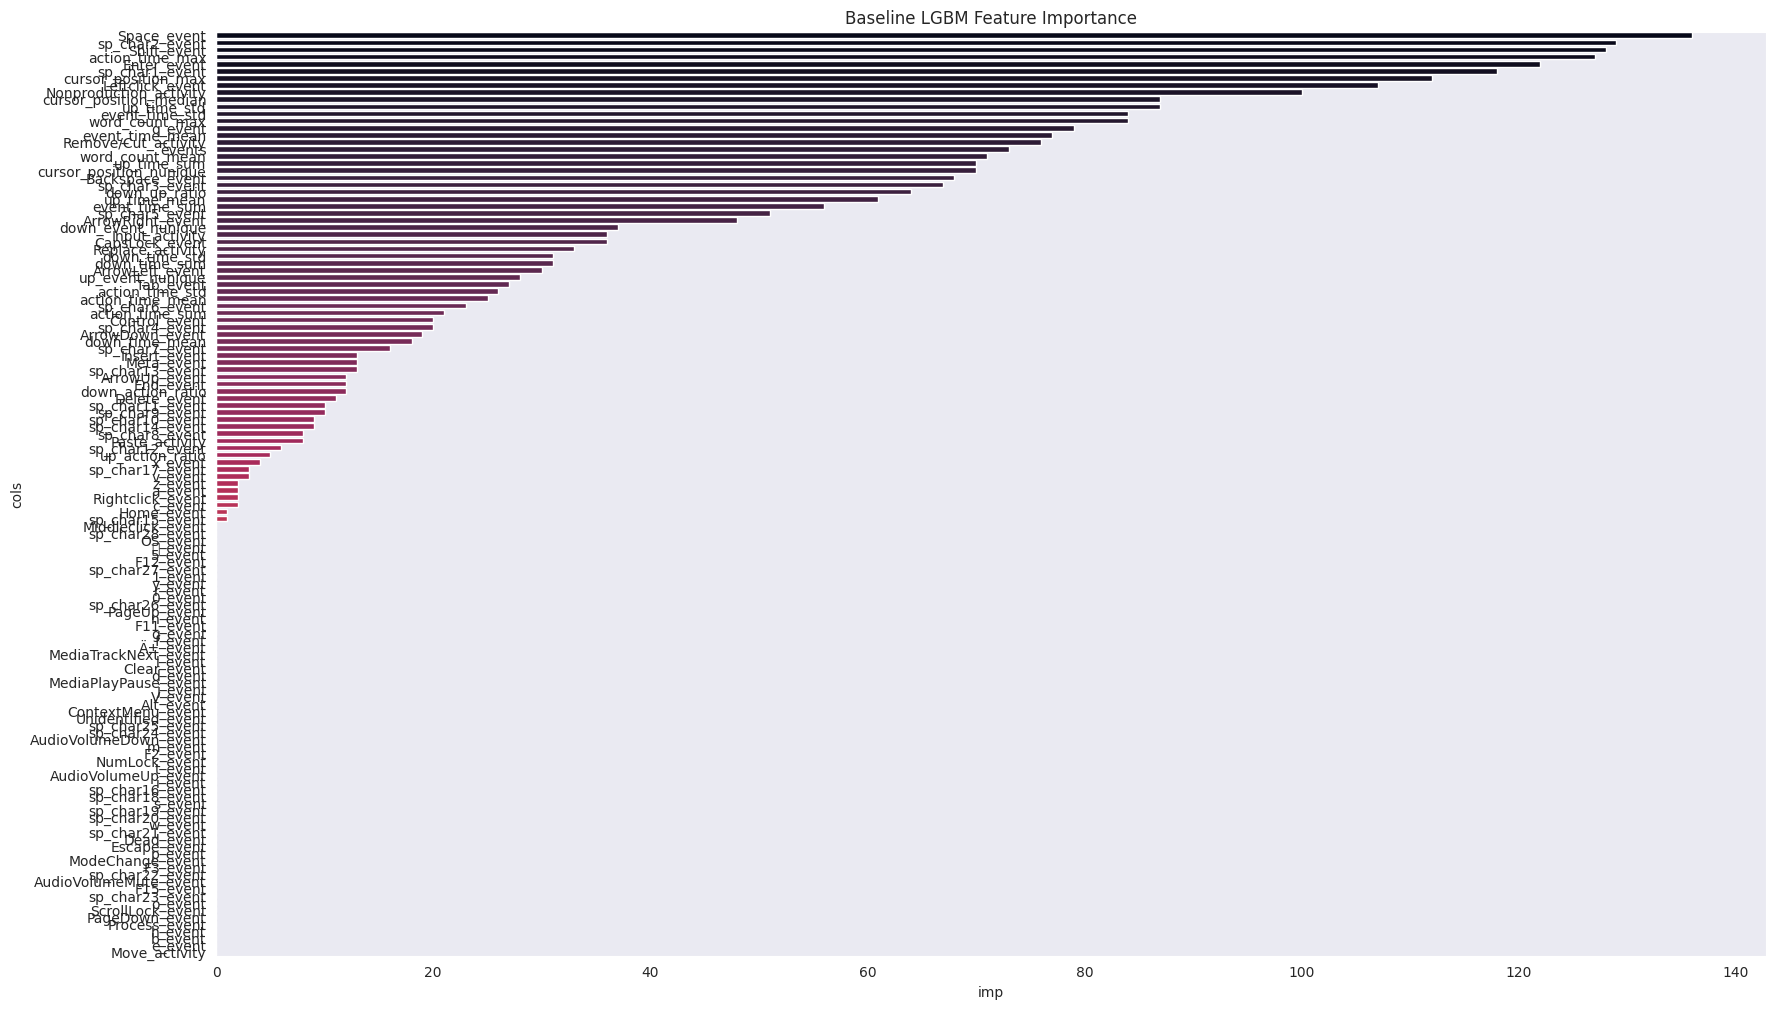

In [21]:
lgbm_importance = plotImportance("Baseline LGBM",lgbmmodel)

### Baseline Voting

In [22]:
vrmodel = VotingRegressor([("rf",rfmodel),("gb",gbmodel),("xgb",xgbmodel),("lgbm",lgbmmodel)])
vrmodel.fit(X_train,y_train)
print("-"*25,"Voting Baseline","-"*25)
preds = vrmodel.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(vrmodel,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- Voting Baseline -------------------------
MAE: 0.5176991482252135
MSE: 0.442999416238432
RMSE: 0.6655820131572306
RMSE CV: 0.6563431979003018


<div id = "5" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
    Feature Selection
    </h1>
</div>

In [23]:
rf_importance = rf_importance[:50]["cols"]
gb_importance = gb_importance[:50]["cols"]
xgb_importance = xgb_importance[:50]["cols"]
lgbm_importance = lgbm_importance[:50]["cols"]

In [24]:
final_columns = []
for i in X.columns:
    score = 0
    if i in rf_importance.to_list():
        score+=1
    if i in gb_importance.to_list():
        score+=1
    if i in xgb_importance.to_list():
        score+=1
    if i in lgbm_importance.to_list():
        score+=1
    if score>=3:
        final_columns.append(i)
print(final_columns)

['events', 'up_time_sum', 'up_time_mean', 'up_time_std', 'down_time_sum', 'down_time_mean', 'down_time_std', 'event_time_sum', 'event_time_mean', 'event_time_std', 'action_time_sum', 'action_time_max', 'action_time_mean', 'action_time_std', 'down_up_ratio', 'down_action_ratio', 'down_event_nunique', 'up_event_nunique', 'cursor_position_nunique', 'cursor_position_median', 'cursor_position_max', 'word_count_max', 'word_count_mean', 'q_event', 'Space_event', 'Backspace_event', 'Shift_event', 'Leftclick_event', 'ArrowLeft_event', 'sp_char1_event', 'sp_char2_event', 'ArrowDown_event', 'ArrowUp_event', 'Enter_event', 'CapsLock_event', 'sp_char3_event', 'sp_char4_event', 'sp_char5_event', 'sp_char6_event', 'Tab_event', 'sp_char13_event', 'Insert_event', 'Nonproduction_activity', 'Input_activity', 'Remove/Cut_activity', 'Replace_activity']


<div id="6" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
    Optuna Tuning
</div>

In [25]:
X = train_data[final_columns]
y = train_data["score"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=seed)

test_data = test_data[final_columns]

### Opt LGBM

In [26]:
# def objective(trial):
#     params = {
#         'n_estimators' : trial.suggest_int('n_estimators',500,10000),
#         "max_depth":trial.suggest_int('max_depth',3,100),
#         "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.25, log=True),
#         "min_child_weight" : trial.suggest_float('min_child_weight', 0.5,4),
#         "min_child_samples" : trial.suggest_int('min_child_samples',1,250),
#         "subsample" : trial.suggest_float('subsample', 0.2, 1),
#         "subsample_freq" : trial.suggest_int('subsample_freq',0,5),
#         "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#         'num_leaves' : trial.suggest_int('num_leaves', 2, 128),
#     }
#     lgbmmodel_optuna = LGBMRegressor(**params,random_state=seed,device="gpu")
#     cv = -1*cross_val_score(lgbmmodel_optuna, X, y, cv = 4,scoring='neg_root_mean_squared_error').mean()
#     return cv

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100,timeout=5000)

In [27]:
# Hyperparameter tuned using Optuna 0.648640106283897
params_lgbm = {'n_estimators': 1140, 'max_depth': 3, 'learning_rate': 0.012192985298639868,
               'min_child_weight': 2.5028737839599557, 'min_child_samples': 40,
               'subsample': 0.5833615591152317, 'subsample_freq': 1, 'colsample_bytree': 0.7342387857363913}

lgbm_opt = LGBMRegressor(**params_lgbm,random_state=seed,device="gpu")
lgbm_opt.fit(X_train,y_train)

LGBMRegressor(colsample_bytree=0.7342387857363913, device='gpu',
              learning_rate=0.012192985298639868, max_depth=3,
              min_child_samples=40, min_child_weight=2.5028737839599557,
              n_estimators=1140, subsample=0.5833615591152317,
              subsample_freq=1)

In [28]:
print("-"*25,"LGBM Model Optuna","-"*25)
preds = lgbm_opt.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(lgbm_opt,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- LGBM Model Optuna -------------------------
MAE: 0.48897903029944667
MSE: 0.41032088731168687
RMSE: 0.6405629456280522
RMSE CV: 0.6444708975797434


### Opt XGB

In [29]:
# def objective(trial):
#     params = {
#     'n_estimators' : trial.suggest_int('n_estimators',500,2000),
#     'max_depth':  trial.suggest_int('max_depth',3,8),
#     'min_child_weight': trial.suggest_float('min_child_weight', 2,4),
#     "learning_rate" : trial.suggest_float('learning_rate',1e-4, 0.2),
#     'subsample': trial.suggest_float('subsample', 0.2, 1),
#     'gamma': trial.suggest_float("gamma", 1e-4, 1.0),
#     "colsample_bytree" : trial.suggest_float('colsample_bytree',0.2,1),
#     "colsample_bylevel" : trial.suggest_float('colsample_bylevel',0.2,1),
#     "colsample_bynode" : trial.suggest_float('colsample_bynode',0.2,1),
#     }
    
#     xgbmodel_optuna = XGBRegressor(**params,random_state=seed,tree_method = "gpu_hist")
#     xgbmodel_optuna.fit(X,y)
#     cv = -1*cross_val_score(xgbmodel_optuna, X, y, cv = 4,scoring='neg_root_mean_squared_error').mean()
#     return cv

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100,timeout=5000)

In [30]:
# Hyperparameter tuned using Optuna 0.6469217862169994
params_xgb = {'n_estimators': 786, 'max_depth': 7, 'min_child_weight': 2.039057805276082,
              'learning_rate': 0.014416140789003485, 'subsample': 0.4709832796447838,
              'gamma': 0.944842834910575, 'colsample_bytree': 0.3665662093440971,
              'colsample_bylevel': 0.5005441850291041, 'colsample_bynode': 0.5984372995917981}

xgb_opt = XGBRegressor(**params_xgb,random_state=seed,tree_method = "gpu_hist")
xgb_opt.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5005441850291041,
             colsample_bynode=0.5984372995917981,
             colsample_bytree=0.3665662093440971, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.944842834910575, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.014416140789003485, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2.039057805276082, missing=nan,
             monotone_constraints=None, n_estimators=786, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [31]:
print("-"*25,"XGB Model Optuna","-"*25)
preds = xgb_opt.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(xgb_opt,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- XGB Model Optuna -------------------------
MAE: 0.4896438768973537
MSE: 0.4127378285677786
RMSE: 0.6424467515427085
RMSE CV: 0.647405380586888


### Opt Voting Regressor

In [32]:
vr_opt = VotingRegressor([("xgb",xgb_opt),("lgbm",lgbm_opt)],weights=[0.3,0.7])
vr_opt.fit(X_train,y_train)
print("-"*25,"Voting Optuna","-"*25)
preds = vr_opt.predict(X_test)
print("MAE:",mean_absolute_error(y_test,preds))
print("MSE:",mean_squared_error(y_test,preds))
print("RMSE:",mean_squared_error(y_test,preds,squared=False))
print("RMSE CV:",-1*cross_val_score(vr_opt,X,y,cv=4,scoring='neg_root_mean_squared_error').mean())

------------------------- Voting Optuna -------------------------
MAE: 0.48749501001285556
MSE: 0.4078860096075276
RMSE: 0.6386595412326724
RMSE CV: 0.6430746026486786


<div id = "7" style="background-color: #F2E5E5; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #2B3A55; font-weight: bold; font-size: 42px;">
    Creating 'submission.csv'
</div>

In [33]:
vr_opt.fit(X,y)

submission = pd.DataFrame()
submission["id"] = test_data.index
submission["score"] = vr_opt.predict(test_data)

submission.to_csv("submission.csv",index=False,header=True)

submission.head()

id     score
0  0000aaaa  1.110804
1  2222bbbb  1.120865
2  4444cccc  1.147077